In [2]:
# Import pandas library
import pandas as pd

# Define the file path
file_path = r'C:\Users\Lenovo\Downloads\PLP\Python\week7\country_wise_latest.csv' 

# Load the dataset
df = pd.read_csv(file_path)

# Check the column names
print("Column Names:")
print(df.columns)

# Preview the first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

Column Names:
Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

First 5 Rows:
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95        

In [3]:
# Import pandas
import pandas as pd

# Load data
file_path = r'C:\Users\Lenovo\Downloads\PLP\Python\week7\country_wise_latest.csv'
df = pd.read_csv(file_path)

# ✅ Filter for East African countries
east_african_countries = [
    'Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi',
    'Ethiopia', 'South Sudan', 'Somalia', 'Eritrea'
]
df_filtered = df[df['Country/Region'].isin(east_african_countries)]

# ✅ Drop rows with missing critical values
critical_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active']
df_filtered = df_filtered.dropna(subset=critical_columns)

# ✅ Convert 'Date' column to datetime if present
if 'Date' in df_filtered.columns:
    df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], errors='coerce')
    df_filtered = df_filtered.dropna(subset=['Date'])

# ✅ Fill or interpolate remaining missing numeric values
df_cleaned = df_filtered.fillna(method='ffill').interpolate()

# ✅ Preview cleaned data
print("Cleaned Data for East African Countries:")
print(df_cleaned.head())

# ✅ Check remaining missing values
print("\nRemaining Missing Values:")
print(df_cleaned.isnull().sum())

Cleaned Data for East African Countries:
    Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
28         Burundi        378       1        301      76         17   
55         Eritrea        265       0        191      74          2   
58        Ethiopia      14547     228       6386    7933        579   
90           Kenya      17975     285       7833    9857        372   
139         Rwanda       1879       5        975     899         58   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
28            0             22                0.26                  79.63   
55            0              2                0.00                  72.08   
58            5            170                1.57                  43.90   
90            5             90                1.59                  43.58   
139           0             57                0.27                  51.89   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
28

In [4]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r'C:\Users\Lenovo\Downloads\PLP\Python\week7\country_wise_latest.csv'
df = pd.read_csv(file_path)

# ✅ Define East African countries
east_african_countries = [
    'Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi',
    'Ethiopia', 'South Sudan', 'Somalia', 'Eritrea'
]

# ✅ Filter for East African countries only
df = df[df['Country/Region'].isin(east_african_countries)]

# ✅ Convert 'Date' to datetime if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])

# ✅ Sort data by Date
df = df.sort_values('Date')

# ✅ Total confirmed cases over time
plt.figure(figsize=(12, 6))
for country in east_african_countries:
    country_data = df[df['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)
plt.title('Total COVID-19 Cases Over Time (East Africa)')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Total deaths over time
plt.figure(figsize=(12, 6))
for country in east_african_countries:
    country_data = df[df['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Deaths'], label=country)
plt.title('Total Deaths Over Time (East Africa)')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Daily new cases
df['New_Cases'] = df.groupby('Country/Region')['Confirmed'].diff().fillna(0)

# ✅ Plot daily new cases
plt.figure(figsize=(12, 6))
for country in east_african_countries:
    country_data = df[df['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['New_Cases'], label=country)
plt.title('Daily New Cases (East Africa)')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Death rate = deaths / confirmed
df['Death_Rate'] = (df['Deaths'] / df['Confirmed']).fillna(0).clip(upper=1)

# ✅ Latest values per country
latest = df.sort_values('Date').groupby('Country/Region').last().reset_index()

# ✅ Bar chart of total confirmed cases by country
plt.figure(figsize=(10, 6))
sns.barplot(data=latest, x='Country/Region', y='Confirmed', palette='Blues_d')
plt.title('Total Confirmed Cases (Latest) - East Africa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ Optional: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(latest[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (East Africa Latest Data)')
plt.tight_layout()
plt.show()

KeyError: 'Date'

In [5]:
print(df.columns)

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


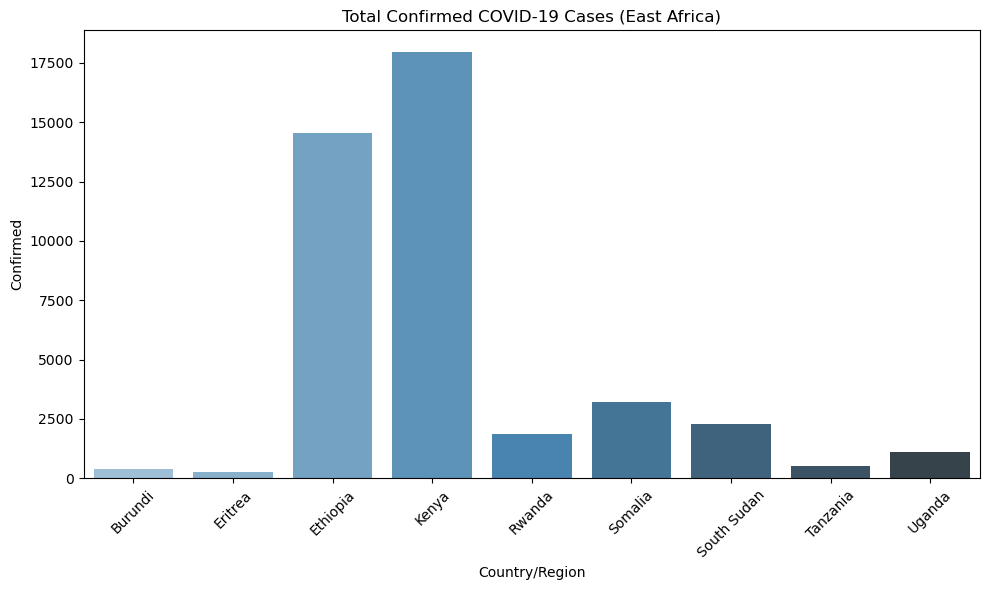

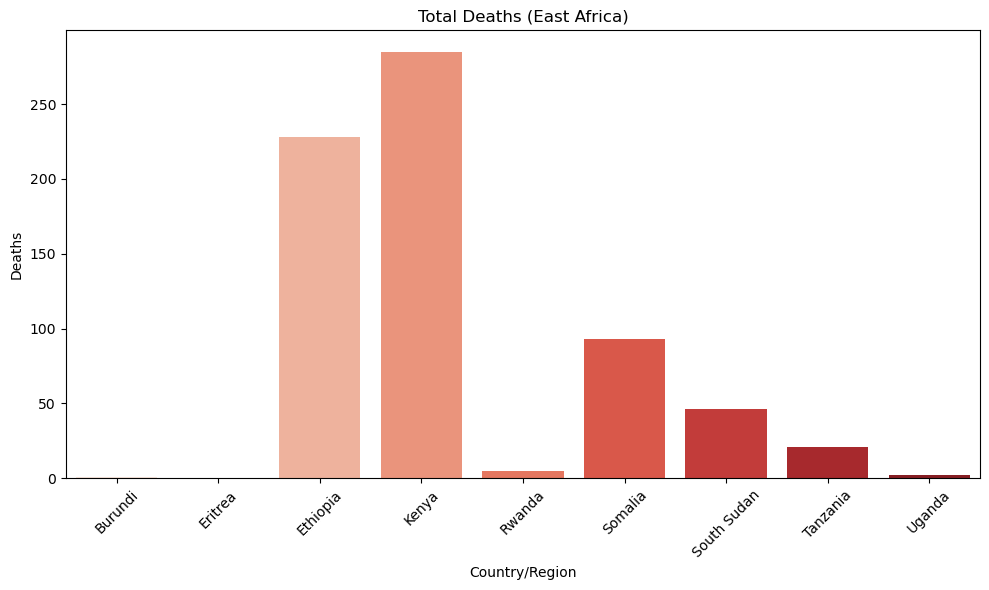

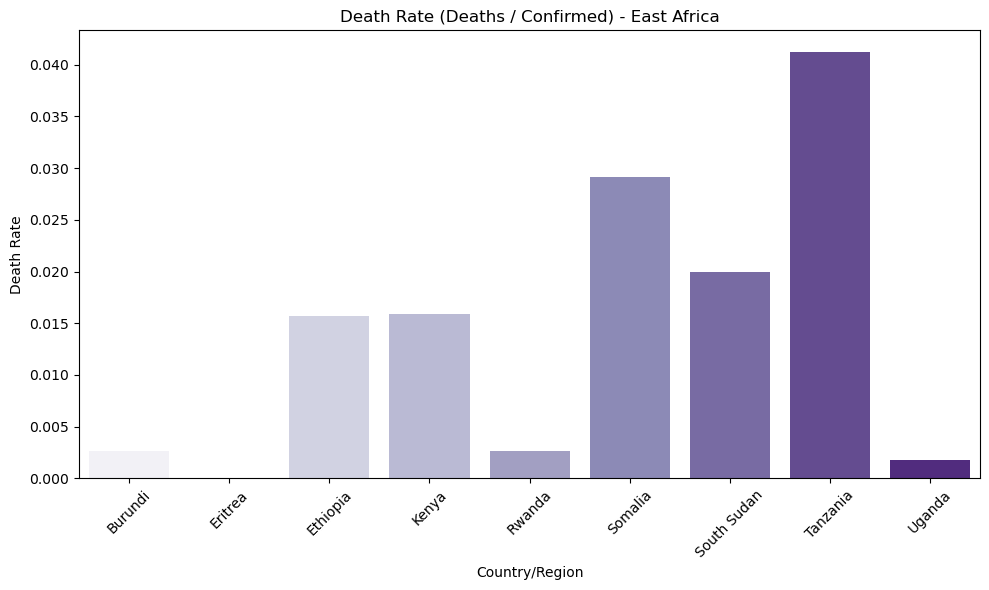

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r'C:\Users\Lenovo\Downloads\PLP\Python\week7\country_wise_latest.csv'
df = pd.read_csv(file_path)

# ✅ Filter East African countries
east_african_countries = [
    'Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi',
    'Ethiopia', 'South Sudan', 'Somalia', 'Eritrea'
]
df = df[df['Country/Region'].isin(east_african_countries)]

# ✅ Calculate death rate
df['Death Rate'] = (df['Deaths'] / df['Confirmed']).fillna(0).clip(upper=1)

# ✅ Bar plot: Total Confirmed Cases
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Country/Region', y='Confirmed', palette='Blues_d')
plt.title('Total Confirmed COVID-19 Cases (East Africa)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ Bar plot: Total Deaths
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Country/Region', y='Deaths', palette='Reds')
plt.title('Total Deaths (East Africa)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ Bar plot: Death Rate
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Country/Region', y='Death Rate', palette='Purples')
plt.title('Death Rate (Deaths / Confirmed) - East Africa')
plt.ylabel('Death Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

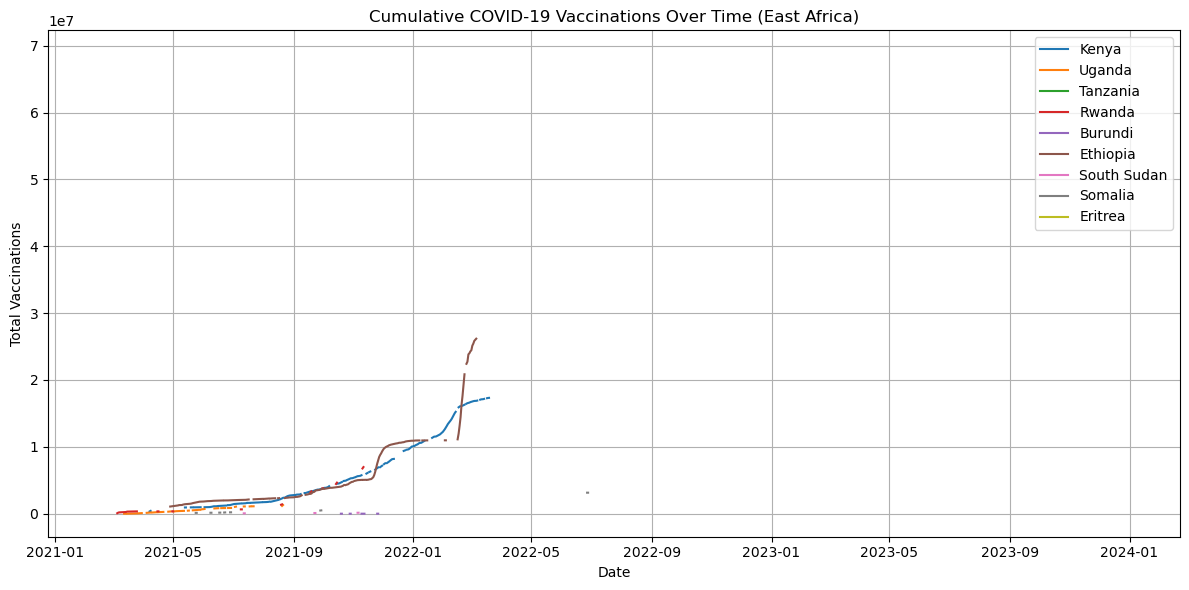

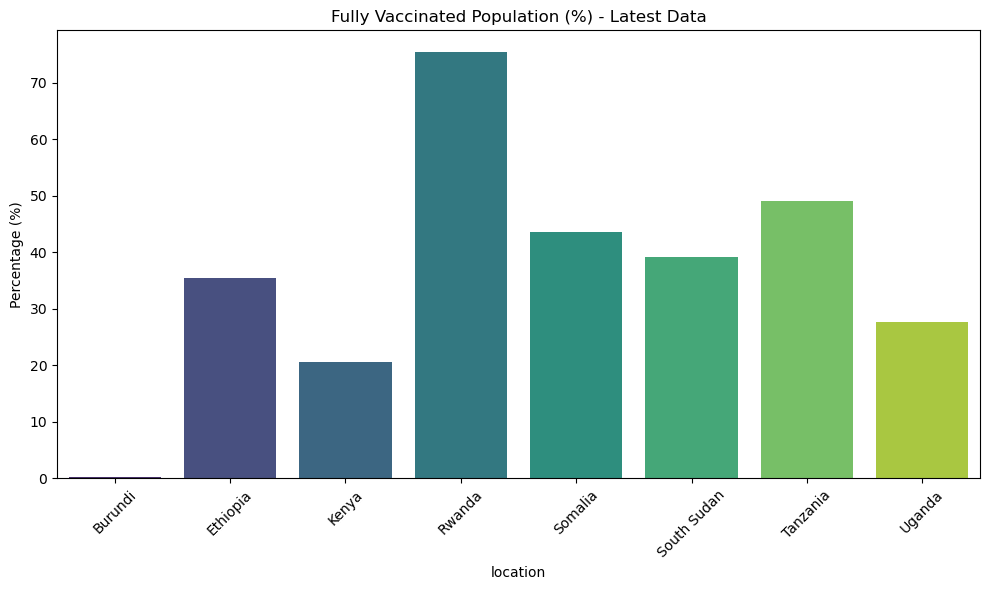

In [7]:
!pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
east_african_countries = [
    'Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Burundi',
    'Ethiopia', 'South Sudan', 'Somalia', 'Eritrea'
]
df_east_africa = df[df['location'].isin(east_african_countries)]
plt.figure(figsize=(12, 6))
for country in east_african_countries:
    country_data = df_east_africa[df_east_africa['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Cumulative COVID-19 Vaccinations Over Time (East Africa)')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
latest_vaccination = df_east_africa.groupby('location').last().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=latest_vaccination, x='location', y='people_fully_vaccinated_per_hundred', palette='viridis')
plt.title('Fully Vaccinated Population (%) - Latest Data')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd
import plotly.express as px

# Load the vaccination and cases dataset from the online link
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
df = pd.read_csv(url)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter for the latest available data for each country
latest_data = df.groupby('location').last().reset_index()

# Merge the latest data for cases and vaccinations (using 'iso_code' for matching countries)
# Download the global cases dataset from a trusted source (e.g., OWID repository)
url_cases = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhucsse/confirmed_global.csv'
df_cases = pd.read_csv(url_cases)

# Filter for the latest data (latest column is the most recent date of reported cases)
df_cases['date'] = pd.to_datetime(df_cases['date'])
latest_cases = df_cases.groupby('iso_code').last().reset_index()

# Merge the two datasets on 'iso_code'
merged_df = pd.merge(latest_data[['iso_code', 'total_vaccinations']], latest_cases[['iso_code', 'confirmed']], 
                     on='iso_code', how='inner')

# ✅ Plot choropleth map for total vaccinations
fig = px.choropleth(merged_df,
                    locations="iso_code",
                    color="total_vaccinations",
                    hover_name="iso_code",
                    color_continuous_scale="Viridis",
                    title="Total COVID-19 Vaccinations by Country",
                    labels={"total_vaccinations": "Total Vaccinations"})
fig.update_geos(showcoastlines=True, coastlinecolor="Black", projection_type="natural earth")
fig.show()

# ✅ Plot choropleth map for total confirmed cases
fig = px.choropleth(merged_df,
                    locations="iso_code",
                    color="confirmed",
                    hover_name="iso_code",
                    color_continuous_scale="Plasma",
                    title="Total COVID-19 Confirmed Cases by Country",
                    labels={"confirmed": "Total Confirmed Cases"})
fig.update_geos(showcoastlines=True, coastlinecolor="Black", projection_type="natural earth")
fig.show()

HTTPError: HTTP Error 404: Not Found

In [9]:
import pandas as pd
import plotly.express as px

# Load COVID-19 data from OWID GitHub repository
url_cases = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhucsse/confirmed_global.csv'
url_vaccinations = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/covid-19-vaccinations.csv'

# Load the datasets
df_cases = pd.read_csv(url_cases)
df_vaccinations = pd.read_csv(url_vaccinations)

# Preview the data to understand its structure
print("Cases Dataset Columns:", df_cases.columns)
print("Vaccination Dataset Columns:", df_vaccinations.columns)

# Merge the latest data for cases and vaccinations (using 'iso_code' for matching countries)
df_cases['date'] = pd.to_datetime(df_cases['date'])
df_vaccinations['date'] = pd.to_datetime(df_vaccinations['date'])

# Filter for the latest available date
latest_date_cases = df_cases['date'].max()
latest_date_vaccinations = df_vaccinations['date'].max()

df_cases_latest = df_cases[df_cases['date'] == latest_date_cases]
df_vaccinations_latest = df_vaccinations[df_vaccinations['date'] == latest_date_vaccinations]

# Merge the datasets on iso_code
df_merged = pd.merge(df_cases_latest[['iso_code', 'total_cases']],
                     df_vaccinations_latest[['iso_code', 'total_vaccinations']],
                     on='iso_code', how='inner')

# Plot the choropleth map for total cases by country
fig = px.choropleth(df_merged,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="iso_code",
                    color_continuous_scale="Viridis",
                    title="COVID-19 Total Cases by Country (Latest Available Data)")
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")
fig.show()

# Alternatively, plot a choropleth map for vaccination rates
fig_vaccination = px.choropleth(df_merged,
                                locations="iso_code",
                                color="total_vaccinations",
                                hover_name="iso_code",
                                color_continuous_scale="Blues",
                                title="COVID-19 Total Vaccinations by Country (Latest Available Data)")
fig_vaccination.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="lightgray")
fig_vaccination.show()

HTTPError: HTTP Error 404: Not Found

In [10]:
import pandas as pd
import plotly.express as px

# Load the vaccination dataset from OWID
url_vaccinations = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
df_vaccinations = pd.read_csv(url_vaccinations)

# Convert 'date' column to datetime
df_vaccinations['date'] = pd.to_datetime(df_vaccinations['date'])

# Filter for the latest data (last row per country)
latest_vaccinations = df_vaccinations.groupby('location').last().reset_index()

# Load the confirmed cases dataset from OWID
url_cases = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhucsse/confirmed_global.csv'
df_cases = pd.read_csv(url_cases)

# Convert 'date' column to datetime for confirmed cases data
df_cases['date'] = pd.to_datetime(df_cases['date'])

# Filter for the latest data (last row per country)
latest_cases = df_cases.groupby('iso_code').last().reset_index()

# Merge the two datasets (vaccination and confirmed cases) based on 'iso_code'
merged_df = pd.merge(latest_vaccinations[['iso_code', 'total_vaccinations']],
                     latest_cases[['iso_code', 'confirmed']],
                     on='iso_code', how='inner')

# Plot choropleth map for total vaccinations
fig_vaccinations = px.choropleth(merged_df,
                                  locations="iso_code",
                                  color="total_vaccinations",
                                  hover_name="iso_code",
                                  color_continuous_scale="Viridis",
                                  title="Total COVID-19 Vaccinations by Country",
                                  labels={"total_vaccinations": "Total Vaccinations"})

# Update the map's geospatial features
fig_vaccinations.update_geos(showcoastlines=True, coastlinecolor="Black", projection_type="natural earth")
fig_vaccinations.show()

# Plot choropleth map for total confirmed cases
fig_cases = px.choropleth(merged_df,
                          locations="iso_code",
                          color="confirmed",
                          hover_name="iso_code",
                          color_continuous_scale="Plasma",
                          title="Total COVID-19 Confirmed Cases by Country",
                          labels={"confirmed": "Total Confirmed Cases"})

# Update the map's geospatial features
fig_cases.update_geos(showcoastlines=True, coastlinecolor="Black", projection_type="natural earth")
fig_cases.show()

HTTPError: HTTP Error 404: Not Found